# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loans = pd.read_csv("prosperLoanData.csv")

In [3]:
# high-level overview of data shape and composition
loans.shape

(113937, 81)

In [4]:
loans.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [5]:
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
ListingCategory = {
    0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use',
    6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
    11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',  20: 'Wedding Loans'
}

loans['ListingCategory'] = loans['ListingCategory (numeric)'].apply(lambda x: ListingCategory[x])
loans = loans.drop(['ListingCategory (numeric)'], axis=1)

In [7]:
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')
loans['ListingCategory'] = loans['ListingCategory'].astype('category')
loans['BorrowerState'] = loans['BorrowerState'].astype('category')
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
loans['Occupation'] = loans['Occupation'].astype('category')
loans['Term'] = loans['Term'].astype('category')

In [8]:
un_ordinal_var_dict = {
    'EmploymentStatus': ['Self-employed', 'Employed', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired'],

    'ListingCategory': [ 'Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
        'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes', 'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
        'Large Purchases', 'Student Use', 'Boat', 'RV', 'Cosmetic Procedure', 'Green Loans'],

    'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
        'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
        'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
        'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
        'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
        
    'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'],

    'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - College Senior', 'Principal', "Teacher's Aide",
       'Pilot - Private/Commercial', 'Religious', 'Homemaker',
       'Student - College Graduate Student', 'Student - Technical School',
       'Psychologist', 'Biologist', 'Student - College Sophomore',
       'Judge', 'Student - College Junior', 'Car Dealer',
       'Student - Community College', 'Student - College Freshman']
}

for var in un_ordinal_var_dict:
    un_ordered_var = pd.api.types.CategoricalDtype(categories = un_ordinal_var_dict[var])
    loans[var] = loans[var].astype(un_ordered_var)

In [9]:
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'].astype(str))
loans['ClosedDate'] = pd.to_datetime(loans['ClosedDate'].astype(str))
loans['DateCreditPulled'] = pd.to_datetime(loans['DateCreditPulled'].astype(str))
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'].astype(str))
loans['FirstRecordedCreditLine'] = pd.to_datetime(loans['FirstRecordedCreditLine'].astype(str))

In [10]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {
     'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
     'CreditGrade': ['HR','E','D','C','B','A','AA'],
     'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
     'LoanOriginationQuarter': [
                         'Q4 2005',
                         'Q1 2006','Q2 2006','Q3 2006','Q4 2006',
                         'Q1 2007','Q2 2007','Q3 2007','Q4 2007',
                         'Q1 2008','Q2 2008','Q3 2008','Q4 2008',
                         'Q2 2009','Q3 2009','Q4 2009',
                         'Q1 2010','Q2 2010','Q3 2010','Q4 2010',
                         'Q1 2011','Q2 2011','Q3 2011','Q4 2011',
                         'Q1 2012','Q2 2012','Q3 2012','Q4 2012',
                         'Q1 2013','Q2 2013','Q3 2013','Q4 2013',
                         'Q1 2014'
                    ]
               }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [11]:
loans.describe()

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.

In [12]:
loans.describe(include=['category'])

,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,LoanOriginationQuarter,ListingCategory
count,28812,113937,113937,84853,108422,110349,106335,106196,113937,96972
unique,7,3,12,7,51,67,7,7,33,20
top,C,36,Current,C,CA,Other,Employed,"$25,000-49,999",Q4 2013,Debt Consolidation
freq,5649,87778,56576,18345,14717,28617,67322,32192,14450,58308


In [13]:
loans.describe(include=['object'])

,ListingKey,GroupKey,LoanKey,MemberKey
count,113937,13341,113937,113937
unique,113066,706,113066,90831
top,17A93590655669644DB4C06,783C3371218786870A73D20,CB1B37030986463208432A1,63CA34120866140639431C9
freq,6,1140,6,9


### What is the structure of your dataset?

> There are 113,937 loans in the dataset

The Proper Rating and Credit Grade follow thesame ordered grading system.
 - 0 - N/A
 - 1 - HR
 - 2 - E
 - 3 - D
 - 4 - C
 - 5 - B
 - 6 - A
 - 7 - AA

 There are also other categorical values such as: LoanStatus, BorrowerState, Occupation, EmploymentStatus, IncomeRange, LoanOriginationQuarter, ListingCategory
 
 Most of the remaining variables are numeric.

### What is/are the main feature(s) of interest in your dataset?

> My interest is focused on determining which features had the most impact on ProsperScore and overall loan outcome

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the most interesting features for this investigation will be the CreditGrade, ProsperRating (Alpha), Occupation, EmploymentStatus, IncomeRange, ListingCategory which will have the most impact on the loans score.
Other numeric variables too such as the Loan Amount will also have an impact on the loan scores.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [14]:
loans['LoanGrade'] = loans['CreditGrade'].combine_first(loans['ProsperRating (Alpha)'])

In [15]:
loans['LoanGrade'].notna().sum() == loans['CreditGrade'].notna().sum() + loans['ProsperRating (Alpha)'].notna().sum()

True

In [16]:
list(loans['IncomeRange'].unique())

['$25,000-49,999',
 '$50,000-74,999',
 nan,
 '$100,000+',
 '$75,000-99,999',
 '$1-24,999',
 'Not employed',
 '$0']

In [17]:
m = {
    'Not employed': '$0',
    '$0': '$0',
    '$1-24,999': '$1-24,999',
    '$25,000-49,999': '$25,000-49,999',
    '$50,000-74,999': '$50,000-74,999',
    '$75,000-99,999': '$75,000-99,999',
    '$100,000+': '$100,000+'
}

loans['IncomeRange'] = loans['IncomeRange'].map(m).astype('category')

In [18]:
loans['IncomeRange'].unique()

['$25,000-49,999', '$50,000-74,999', NaN, '$100,000+', '$75,000-99,999', '$1-24,999', '$0']
Categories (6, object): ['$0', '$1-24,999', '$100,000+', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999']

In [19]:
m = {
    'Completed': 'Completed',
    'FinalPaymentInProgress': 'Completed',
    'Current': 'Current', 
    
    'Defaulted': 'Defaulted',
    'Chargedoff': 'Defaulted',
    'Cancelled': 'Defaulted',

    'Past Due (1-15 days)': 'Overdue',
    'Past Due (16-30 days)': 'Overdue',
    'Past Due (61-90 days)': 'Overdue',
    'Past Due (31-60 days)': 'Overdue',
    'Past Due (91-120 days)': 'Overdue',
    'Past Due (>120 days)': 'Overdue'
}

loans['LoanStatus'] = loans['LoanStatus'].map(m).astype('category')

In [20]:
loans['LoanStatus'].unique()

['Completed', 'Current', 'Overdue', 'Defaulted']
Categories (4, object): ['Completed', 'Current', 'Defaulted', 'Overdue']

In [21]:
loans['EmploymentStatus'].unique()

['Self-employed', 'Employed', NaN, 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired']
Categories (7, object): ['Self-employed', 'Employed', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired']

In [22]:
m = {
    'Self-employed': 'Employed',
    'Full-time': 'Employed',
    'Part-time': 'Employed',
    'Employed': 'Employed',

    'Not employed': 'Unemployed',
    
    'Retired': 'Retired',

    'Other': 'Other'
}

loans['EmploymentStatus'] = loans['EmploymentStatus'].map(m).astype('category')

In [23]:
numeric_vars = [
    'LoanOriginalAmount', 'BorrowerRate', 'BorrowerAPR', 'StatedMonthlyIncome', 
    # 'LoanOriginalAmount', 'ProsperPrincipalBorrowed', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'ScorexChangeAtTimeOfListing',
    # 'LoanCurrentDaysDelinquent', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'TradesNeverDelinquent (percentage)'
]
categoric_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'LoanGrade', 'LoanStatus']

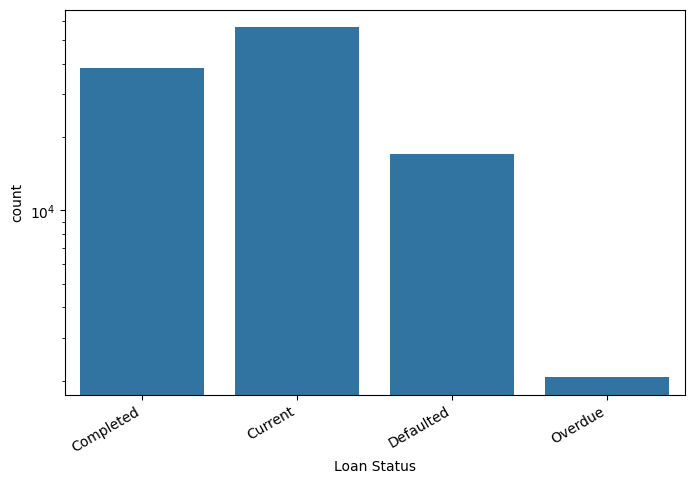

In [24]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='LoanStatus', color=default_color)
plt.yscale('log')
# plt.hist(data = loans, x = 'LoanStatus')
plt.xlabel('Loan Status')
plt.xticks(rotation=30, ha='right')
plt.show()

In [25]:
    # 'LoanOriginalAmount', 'BorrowerRate', 'BorrowerAPR', 'StatedMonthlyIncome', 

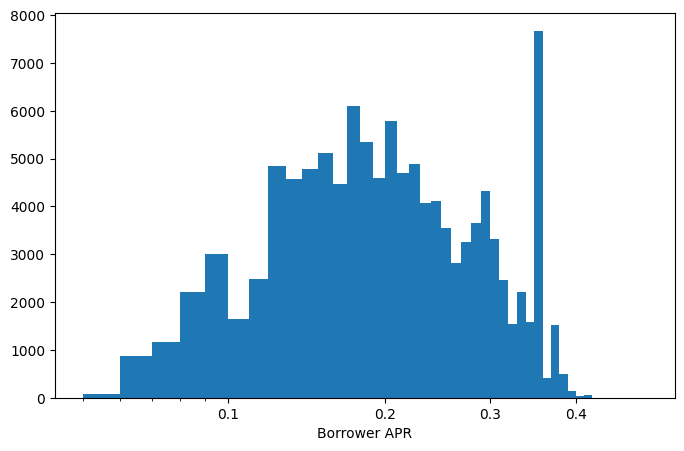

In [74]:
# there's a long tail in the distribution, so let's put it on a log scale instead
binsize = 0.01
bins = np.arange(0.05, 0.5, binsize)
labels = [0.1, 0.2, 0.3, 0.4]

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins=bins)
plt.xscale('logit')
plt.xticks(labels, labels)
plt.xlabel('Borrower APR')
plt.show()

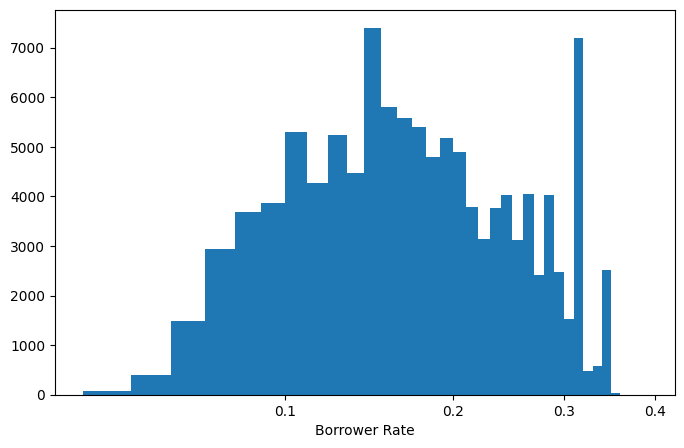

In [73]:
# there's a long tail in the distribution, so let's put it on a log scale instead
binsize = 0.01
bins = np.arange(0.04, 0.4, binsize)
labels = [0.1, 0.2, 0.3, 0.4]

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins=bins)
plt.xscale('logit')
plt.xticks(labels, labels)
plt.xlabel('Borrower Rate')
plt.show()

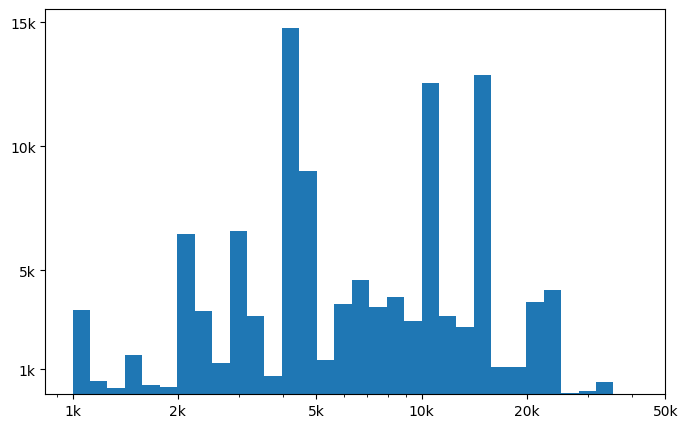

In [59]:
log_binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k'])
plt.yticks([1e3, 5e3, 1e4, 1.5e4], ['1k', '5k', '10k', '15k'])

plt.show()

In [90]:
loans['StatedMonthlyIncome'].min()

0.0

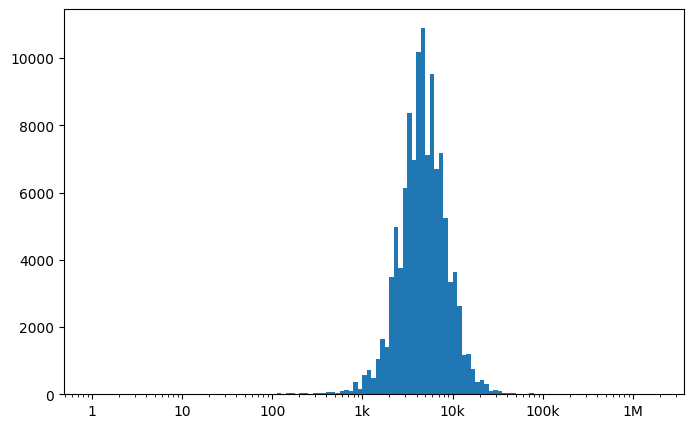

In [98]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(loans['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xticks([1, 10, 100, 1e3, 1e4, 1e5, 1e6],[1, 10, 100, '1k', '10k', '100k', '1M'])

plt.show()

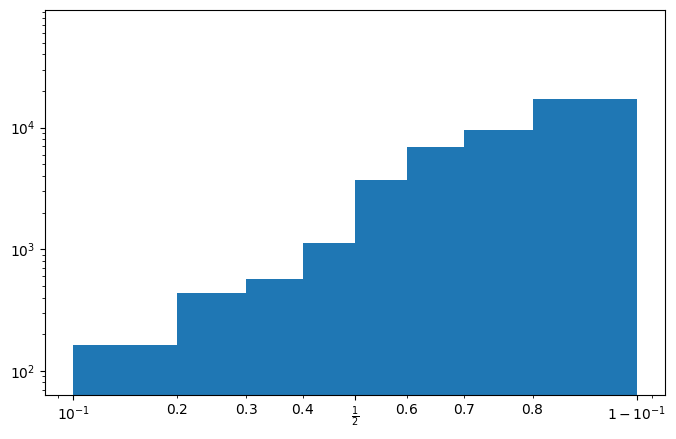

In [16]:
plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='TradesNeverDelinquent (percentage)')
plt.xscale('logit')
plt.yscale('log')

plt.show()

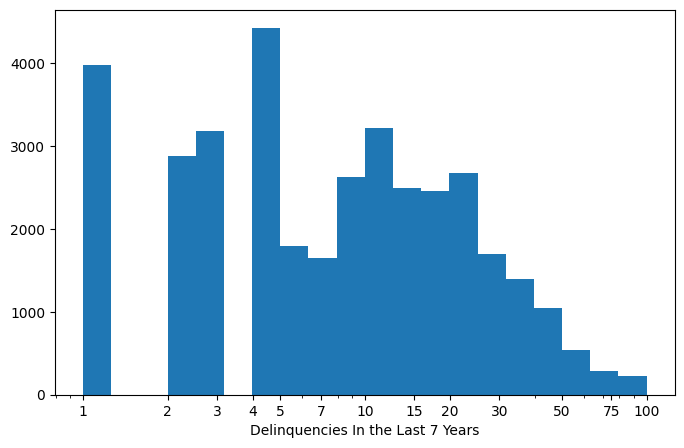

In [17]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(loans['DelinquenciesLast7Years'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='DelinquenciesLast7Years', bins=bins)
plt.xscale('log')
plt.xticks([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 50, 75, 100], [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 50, 75, 100])
plt.xlabel('Delinquencies In the Last 7 Years')
plt.show()

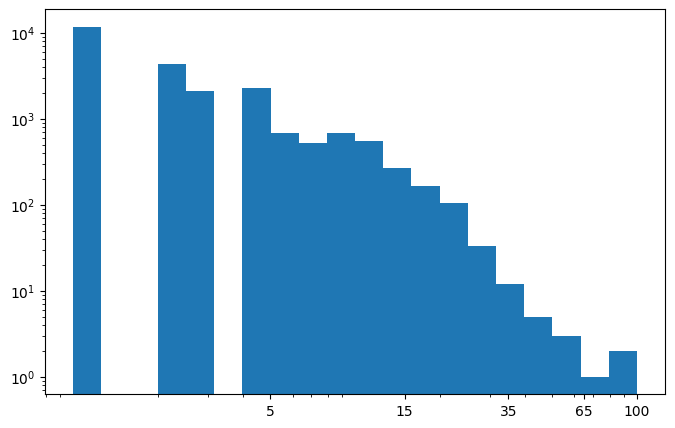

In [18]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(loans['CurrentDelinquencies'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='CurrentDelinquencies', bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xticks([5, 15, 35, 65, 100],[5, 15, 35, 65, 100])

plt.show()

In [19]:
# Outliers
outliers = (loans['CurrentDelinquencies'] > 30)
print(outliers.sum())

29


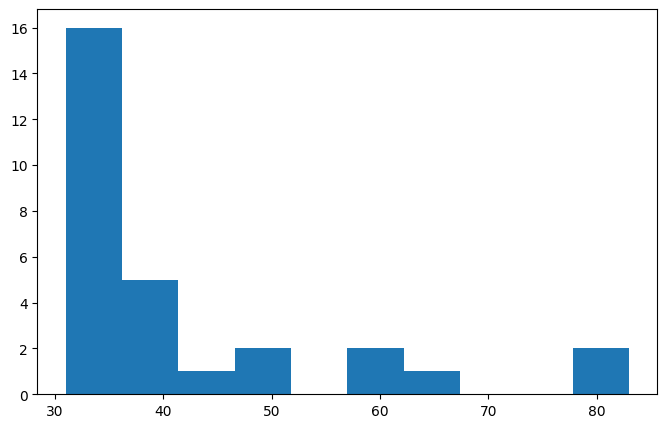

In [20]:
current_delinquencies_outliers = loans.loc[outliers,:]

plt.figure(figsize=[8, 5])
plt.hist(data=current_delinquencies_outliers, x='CurrentDelinquencies')

plt.show()



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

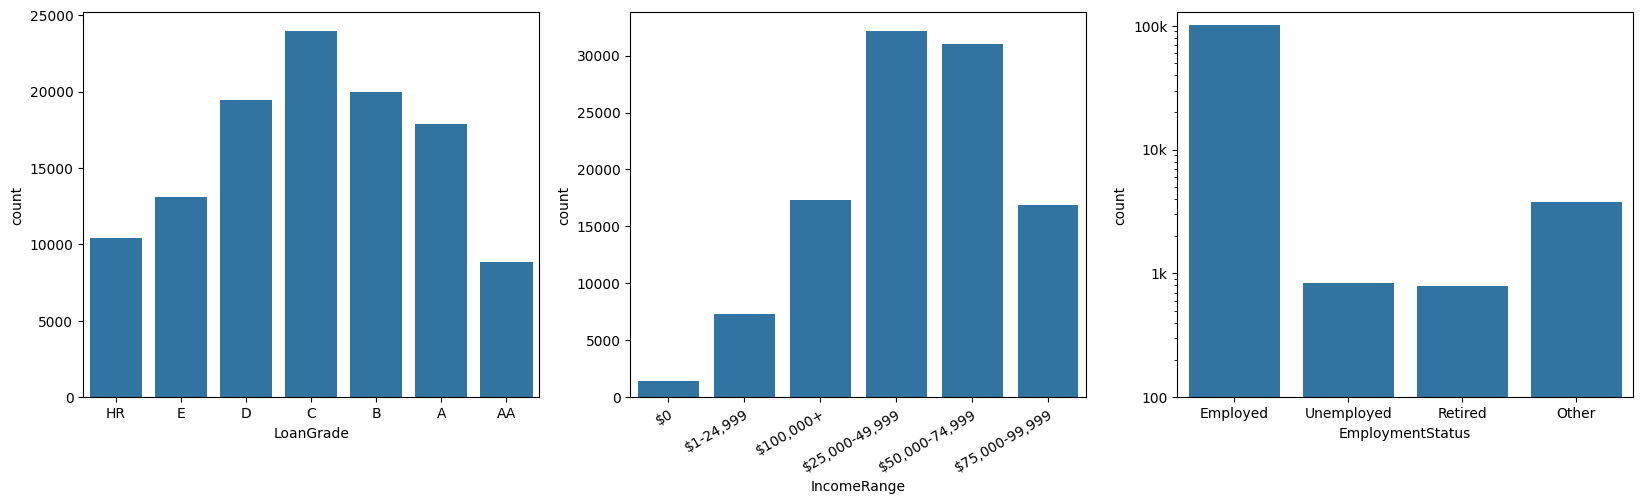

In [144]:
fig, ax = plt.subplots(ncols=3, figsize = [20, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'LoanGrade', color = default_color, ax = ax[0])
sb.countplot(data = loans, x = 'IncomeRange', color = default_color, ax = ax[1])

xticks = ['Employed', 'Unemployed', 'Retired', 'Other']
sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color, ax = ax[2], order=xticks)

ax[2].set_yscale("log")
ax[2].set_yticks([100, 1000, 10000, 100000])
ax[2].set_yticklabels([100, '1k', '10k', '100k'])

# ax[2].set_xticks(xticks)
# ax[2].set_xticklabels(xticks)

plt.setp(ax[1].get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [158]:
loans.CreditScoreRangeUpper

0         659.0
1         699.0
2         499.0
3         819.0
4         699.0
          ...  
113932    719.0
113933    719.0
113934    719.0
113935    699.0
113936    699.0
Name: CreditScoreRangeUpper, Length: 113937, dtype: float64

In [157]:
loans.CreditScoreRangeLower

0         640.0
1         680.0
2         480.0
3         800.0
4         680.0
          ...  
113932    700.0
113933    700.0
113934    700.0
113935    680.0
113936    680.0
Name: CreditScoreRangeLower, Length: 113937, dtype: float64

In [81]:
numeric_vars = [
  'TotalProsperLoans',
'TotalProsperPaymentsBilled',
'OnTimeProsperPayments',
'ProsperPaymentsLessThanOneMonthLate',
'ProsperPaymentsOneMonthPlusLate',
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding',
'ScorexChangeAtTimeOfListing',
    # 'LoanOriginalAmount', 'ProsperPrincipalBorrowed', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'ScorexChangeAtTimeOfListing',
    # 'LoanCurrentDaysDelinquent', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'TradesNeverDelinquent (percentage)'
    # 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments'
]
categoric_vars = ['IncomeRange', 'EmploymentStatus', 'ListingCategory']

In [82]:
loans['LoanKey'].nunique()

113066

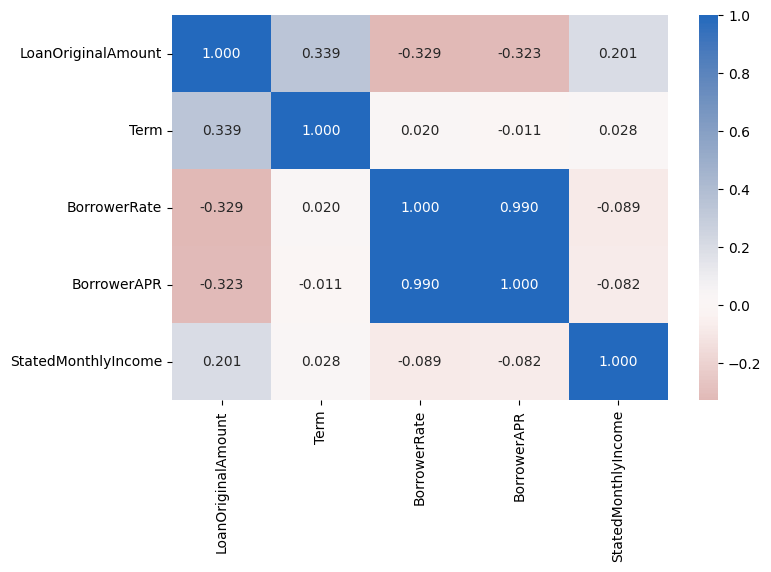

In [160]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

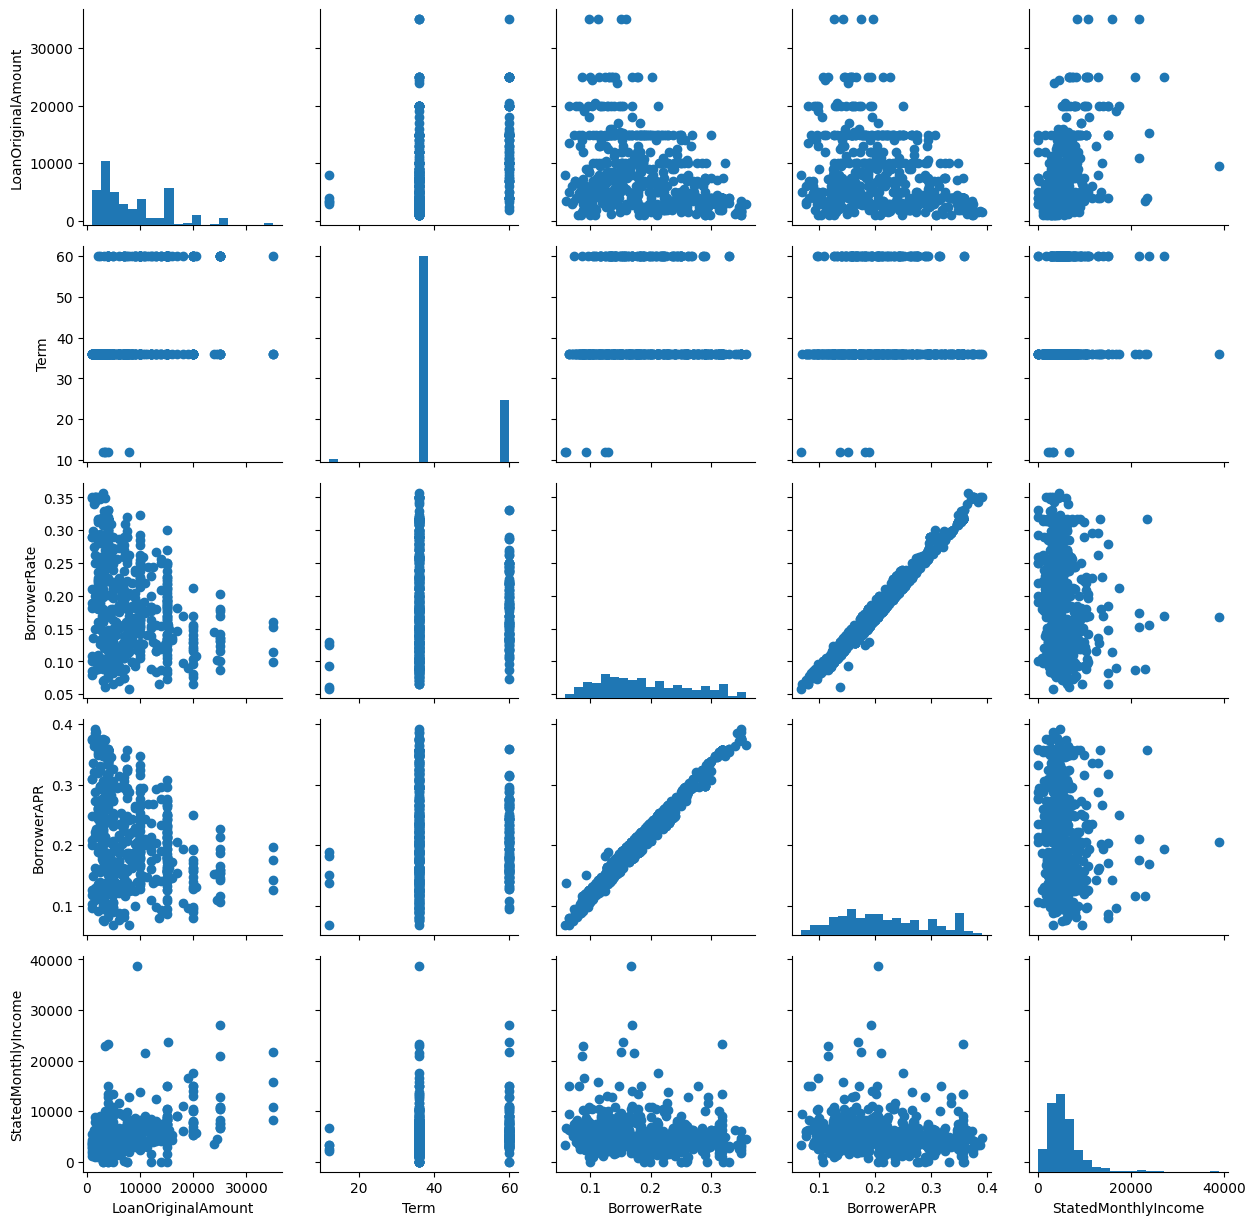

In [161]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(loans.shape[0], 500, replace = False)
diamonds_samp = loans.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [64]:
# 'EmploymentStatus', 'ListingCategory'
# sb.countplot(data = loans, hue = 'EmploymentStatus', x = 'IncomeRange', palette = 'Blues')

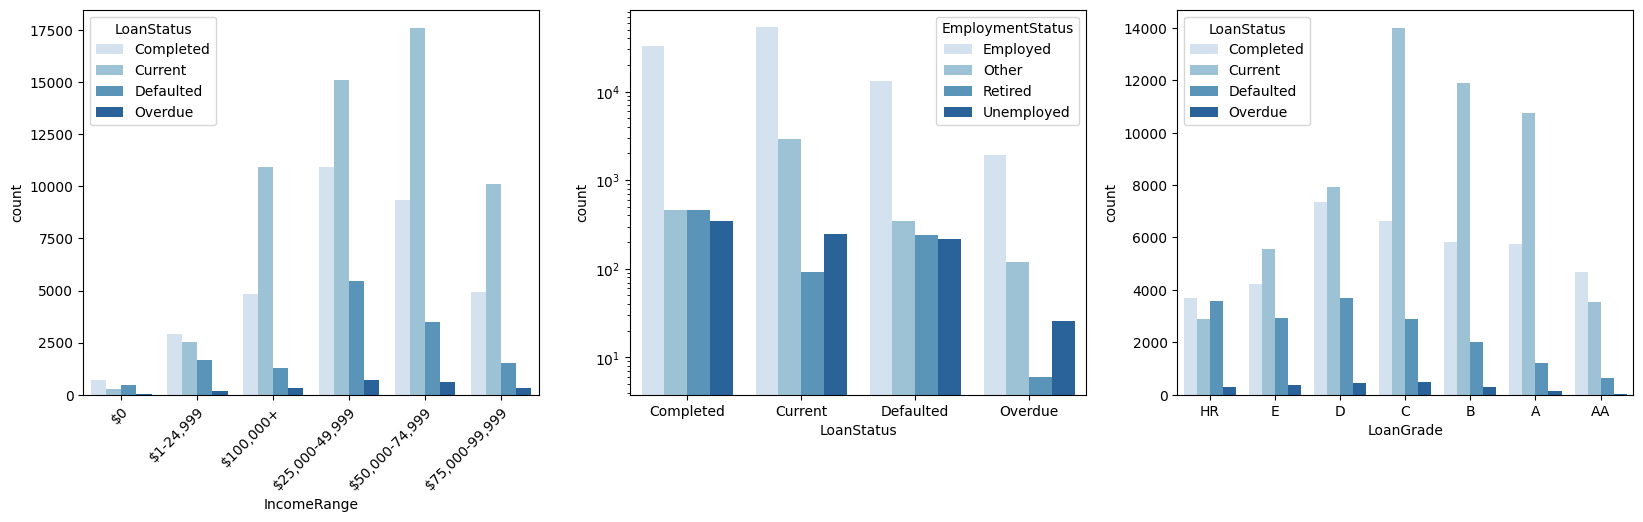

In [204]:
# since there's only three subplots to create, using the full data should be fine.
fig, ax = plt.subplots(ncols=3, figsize = [20, 5])

# subplot 1: color vs cut
sb.countplot(data = loans, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues', ax=ax[0])

# subplot 2: clarity vs. cut
sb.countplot(data = loans, x = 'LoanGrade', hue = 'LoanStatus', palette = 'Blues', ax=ax[2])

# subplot 3: clarity vs. cut
sb.countplot(data = loans, hue = 'EmploymentStatus', x = 'LoanStatus', palette = 'Blues', ax=ax[1])

plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# ax[0].set_yscale('log')
ax[1].set_yscale('log')
# ax[2].set_yscale('log')
# plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

In [196]:
# scatter plot of price vs. carat, with log transform on price axis

income_range_loans = loans.groupby('LoanStatus').mean()

# plt.bar(x=income_range_loans.index, height=income_range_loans['LoanStatus'])
income_range_loans

/var/folders/fy/8jb2hm6j5vb8xcb_0pgh11x80000gn/T/ipykernel_32964/212302736.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_range_loans = loans.groupby('LoanStatus').mean()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
LoanStatus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Completed,390343.043862,36.628230,0.208892,0.186479,0.176651,0.163225,0.086717,0.102336,3.908148,6.528411,81.359731,0.480420,0.187649,685.667274,704.667274,9.695575,8.455216,25.398033,6.299485,328.481648,1.630395,6.103753,0.594642,896.655515,3.924432,0.280305,0.018601,15775.489811,0.515906,12381.738559,22.043366,0.872052,0.822216,0.263964,0.926905,5329.808984,1.359317,20.521237,20.002087,0.478026,0.040633,7275.264139,2128.408953,4.509821,0.000000,20.978723,53.307505,40201.855482,6200.645027,219.207511,7310.595717,6170.327987,1140.267730,-57.707768,-5.101505,0.000000,0.000000,0.000000,0.998690,0.092009,0.051386,36.103287,108.055304
Current,876833.378199,44.511736,0.213740,0.183771,0.173771,0.163595,0.073381,0.090227,4.288426,5.837952,108.783775,0.538709,0.014529,698.739748,717.739748,10.962511,10.048890,28.155561,7.849335,470.337670,0.853383,4.114094,0.292615,912.890024,3.732749,0.294206,0.007830,19275.782805,0.586912,11605.100148,24.458410,0.910860,0.710496,0.262026,0.926789,6153.262946,1.507169,25.716176,25.038235,0.632904,0.045037,9805.029081,3464.812650,-7.736902,0.000000,1.000000,9.411305,99704.891420,10360.835018,319.726382,2499.339115,1494.742878,1004.596238,-55.021413,-1.852073,0.000000,0.000000,0.000000,0.998664,0.009191,0.002209,0.585536,57.140148
Defaulted,325725.625742,37.678519,0.252185,0.231748,0.220939,0.216996,0.115631,0.123385,2.903958,5.427062,80.013141,0.447076,0.274346,640.776722,659.776722,9.270821,8.067777,25.026816,5.594182,319.130591,2.990525,9.535152,1.602467,1425.147494,6.022317,0.445265,0.035827,15559.118251,0.566119,7131.753819,21.187881,0.819153,1.119541,0.348362,0.910726,4450.282437,1.253871,18.674002,17.842706,0.758761,0.072127,6664.259609,3030.439315,-9.858425,1018.224449,16.257900,60.370497,33393.471231,6423.453659,234.756702,2804.650020,1706.312460,1098.337560,-44.731250,-69.526738,4690.376428,4562.974281,168.362167,0.998237,0.082515,0.033852,27.548973,97.431149
Overdue,700301.908079,43.825835,0.267381,0.234412,0.224412,0.211324,0.099837,0.111914,3.316401,5.063861,96.613933,0.485244,0.022254,688.127721,707.127721,9.858249,8.854378,27.251089,6.632801,370.795356,1.155781,4.599419,0.537494,1410.285922,4.850992,0.332366,0.016933,15218.728108,0.569719,8757.808902,22.792937,0.879366,0.850508,0.293430,0.898403,5366.855830,1.383471,22.679339,21.052893,1.504132,0.122314,7956.857025,3709.262099,-21.581722,41.784712,13.800000,16.458152,79494.140784,8258.437349,276.150910,3696.905875,1955.518940,1741.386935,-73.674910,-67.590416,0.000000,0.000000,0.000000,0.997262,0.012579,0.002419,0.905699,68.846154


In [197]:
loans.groupby('IncomeRange').sum()


/var/folders/fy/8jb2hm6j5vb8xcb_0pgh11x80000gn/T/ipykernel_32964/1279355651.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loans.groupby('IncomeRange').sum()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
IncomeRange,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
$0,609084843,53580,355.66572,320.0499,305.9799,157.03270,83.3286,82.68410,1870.0,3652.0,69807.0,480,221,985880.0,1012993.0,11614.0,10199.0,30484.0,8399,518504.0,2099.0,7354.0,633.0,820220.0,3755.0,340.0,29.0,25948956.0,687.98,17056350.0,24901.0,1256.53,984.0,259.60,122,1.206799e+05,276.0,3810.0,3704.0,99.0,7.0,1325198.29,468814.88,-1536.0,488518,7087.0,71108,64059206,8539360,314234.33,6.914452e+06,5056811.52,1.857640e+06,-78840.65,-37547.7380,2479892.02,2438223.27,74117.51,1423.3934,307,217,198116.39,117680
"$1-24,999",3879289125,278928,1803.73100,1604.3454,1528.2854,937.46935,494.0584,508.12145,14626.0,23703.0,417552.0,1523,989,4886040.0,5024246.0,49263.0,43749.0,127533.0,36517,1365699.0,8433.0,30306.0,4025.0,4781703.0,26122.0,2089.0,134.0,45436213.0,3518.90,43291883.0,103836.0,6244.35,5067.0,4687.88,6250,1.038404e+07,1692.0,27754.0,27001.0,704.0,49.0,6408541.38,2305564.17,-5135.0,1784673,26713.0,291436,419884416,31088885,1125086.08,2.281702e+07,16407852.43,6.409163e+06,-285128.70,-125001.8358,5725585.20,5543543.22,200082.83,7263.2800,638,296,228077.20,425852
"$100,000+",12719957034,730044,3391.57352,2934.1584,2762.0634,2254.23647,984.2812,1336.40577,70991.0,102448.0,1928974.0,12637,921,12324740.0,12654143.0,222689.0,200611.0,574131.0,151388,12437448.0,25335.0,104798.0,5450.0,21536563.0,52205.0,3925.0,253.0,661325695.0,10276.75,333922706.0,508827.0,15927.80,14644.0,2902.37,16064,2.157709e+08,5854.0,91744.0,89009.0,2519.0,213.0,48959611.22,16340866.67,-13155.0,1257936,21076.0,376075,1421905457,226648808,7147117.37,9.492095e+07,71990897.49,2.293005e+07,-1344134.66,-208316.1231,10557072.59,10329018.70,314578.23,17298.8564,653,333,269014.53,1906457
"$25,000-49,999",20238114678,1301592,7563.06154,6669.5085,6338.7985,4422.09458,2197.7581,2461.70698,88712.0,131118.0,2591537.0,12207,3132,21889120.0,22500768.0,287928.0,257765.0,755800.0,203891,8845557.0,39259.0,155974.0,17898.0,28880433.0,139128.0,11093.0,548.0,302095946.0,17512.64,237604019.0,635309.0,27847.74,24762.0,8333.03,29867,1.007968e+08,8786.0,142365.0,138377.0,3599.0,388.0,41168178.89,15164940.35,-17975.0,5468248,86882.0,1014537,2226008888,198881762,6771743.70,1.137991e+08,82443610.69,3.135551e+07,-1504266.39,-463757.5208,22629019.70,22003286.47,786616.88,32147.5242,1951,902,591909.02,2219085
"$50,000-74,999",21609014460,1297896,6760.93685,5909.8993,5596.7993,4243.68341,2006.0508,2428.41111,106067.0,152668.0,3293688.0,17121,2234,21476040.0,22065990.0,329937.0,296291.0,869050.0,228531,12258169.0,39548.0,165137.0,13838.0,28215936.0,128912.0,9928.0,420.0,470551848.0,17792.80,327506259.0,746272.0,27563.43

In [198]:
numeric_vars

['LoanOriginalAmount',
 'Term',
 'BorrowerRate',
 'BorrowerAPR',
 'StatedMonthlyIncome']

([0, 1, 2, 3],
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Defaulted'),
  Text(3, 0, 'Overdue')])

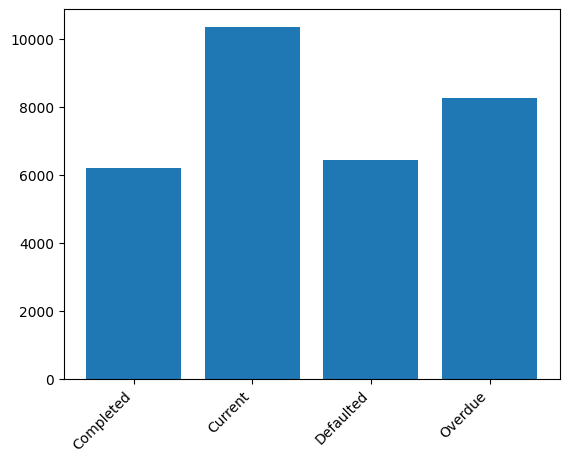

In [199]:
plt.bar(x=income_range_loans.index, height=income_range_loans['LoanOriginalAmount'])
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='LoanOriginalAmount'>

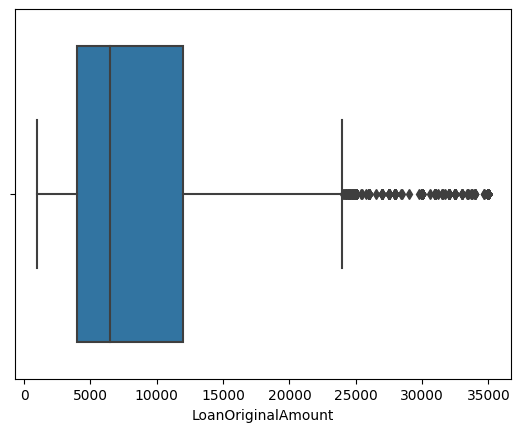

In [168]:
sb.boxplot(x=loans['LoanOriginalAmount'])

In [200]:
pivot_table = loans.pivot_table(index='LoanStatus', columns='IncomeRange', values='LoanOriginalAmount')
pivot_table

IncomeRange,$0,"$1-24,999","$100,000+","$25,000-49,999","$50,000-74,999","$75,000-99,999"
LoanStatus,,,,,,
Completed,5365.886331,3887.538330,9368.242022,5157.363071,6440.060347,7433.318826
Current,5453.289575,4470.579653,14988.218487,7125.611210,10209.175192,12062.697012
Defaulted,7234.124153,4656.492483,11093.491473,5545.107831,6922.167380,8657.038613
Overdue,6431.666667,4237.653595,11526.803279,6609.921512,8707.640893,10025.019417


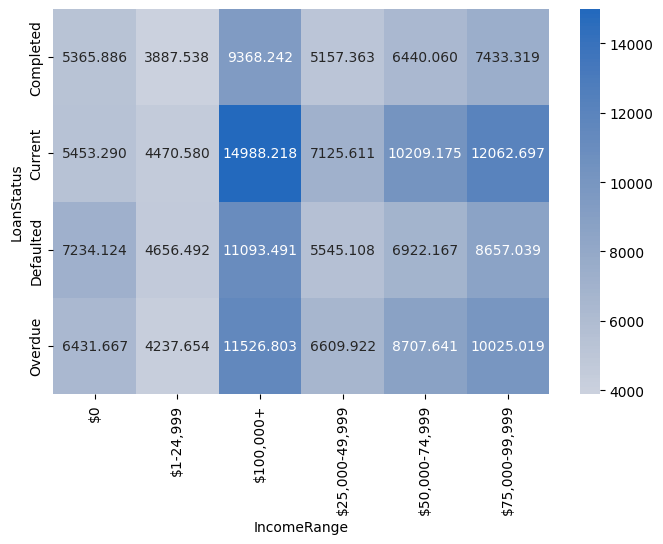

In [201]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pivot_table, annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

In [ ]:
income_range_loan_status_loans = loans.groupby(['LoanStatus', 'IncomeRange']).mean()

# Reshape data to wide format for stacked bar plot
income_range_loan_status_loans = income_range_loan_status_loans.unstack(level=1)

# Create stacked bar plot
income_range_loan_status_loans.plot(kind='bar', stacked=True)
plt.bar()
plt.title('Average Salary by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.legend(title='Gender')
plt.show()


In [91]:
loans['CreditGrade'].unique()

['C', NaN, 'HR', 'AA', 'D', 'B', 'E', 'A']
Categories (7, object): ['HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

In [92]:
loans['ProsperRating (Alpha)'].unique()

[NaN, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR']
Categories (7, object): ['HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

